# Week4

## Name:Shivli Mathur
## Registration number: 220968298
## Batch: Batch 4
## Section: DSE-B

## Implementing K-Nearest Neighbours-Breast Cancer Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset import

In [2]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\breast_cancer.csv")
df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


###  Rename columns as 'Id', 'Clump_thickness', 'Uniformity_Cell_Size','Uniformity_Cell_Shape', 'Marginal_Adhesion','Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin','Normal_Nucleoli', 'Mitoses', 'Class'

In [3]:
df=df.rename(columns={'1000025':'Id','5':'Clump_thickness','1': 'Uniformity_Cell_Size',
       '1.1':'Uniformity_Cell_Shape', '1.2':'Marginal_Adhesion',
       '2':'Single_Epithelial_Cell_Size', '1.3':'Bare_Nuclei', '3':'Bland_Chromatin',
       '1.4':'Normal_Nucleoli', '1.5':'Mitoses', '2.1':'Class'})
df

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


### Drop redundant columns

In [4]:
df.drop(columns=["Id"],inplace=True)#id is redundant as it is just an index(id number) so not imp in distance calculation
df

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,2
694,2,1,1,1,2,1,1,1,1,2
695,5,10,10,3,7,3,8,10,2,4
696,4,8,6,4,3,4,10,6,1,4


### View the summary of the dataset

In [5]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Convert the data type of Bare_Nuclei to an integer

In [6]:
#Bare_nuclei is object type so convert it to int and replace ? with 0
def replace_with_0(x):
    if(x=='?'):
        return 0
    else:
        return x
df["Bare_Nuclei"]=df["Bare_Nuclei"].apply(replace_with_0)
df["Bare_Nuclei"]=df["Bare_Nuclei"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              698 non-null    int64
 1   Uniformity_Cell_Size         698 non-null    int64
 2   Uniformity_Cell_Shape        698 non-null    int64
 3   Marginal_Adhesion            698 non-null    int64
 4   Single_Epithelial_Cell_Size  698 non-null    int64
 5   Bare_Nuclei                  698 non-null    int32
 6   Bland_Chromatin              698 non-null    int64
 7   Normal_Nucleoli              698 non-null    int64
 8   Mitoses                      698 non-null    int64
 9   Class                        698 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 51.9 KB


### Check data types of columns of data frame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              698 non-null    int64
 1   Uniformity_Cell_Size         698 non-null    int64
 2   Uniformity_Cell_Shape        698 non-null    int64
 3   Marginal_Adhesion            698 non-null    int64
 4   Single_Epithelial_Cell_Size  698 non-null    int64
 5   Bare_Nuclei                  698 non-null    int32
 6   Bland_Chromatin              698 non-null    int64
 7   Normal_Nucleoli              698 non-null    int64
 8   Mitoses                      698 non-null    int64
 9   Class                        698 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 51.9 KB


### Identify Missing values, NAN in variables

In [8]:
df.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Check the distribution of variables using histograms

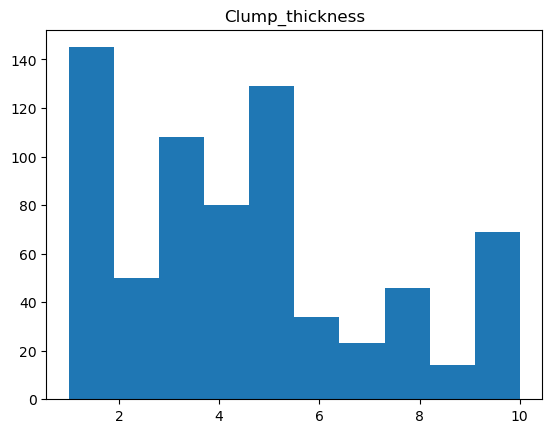

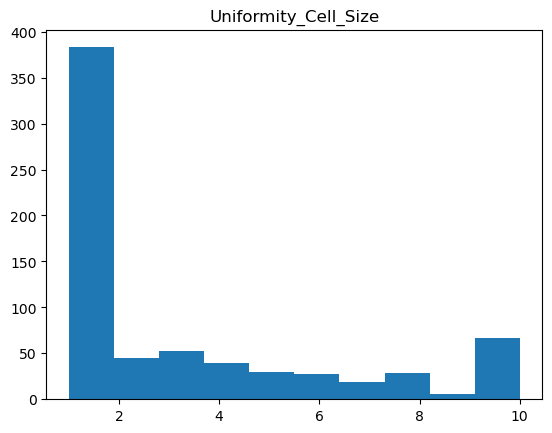

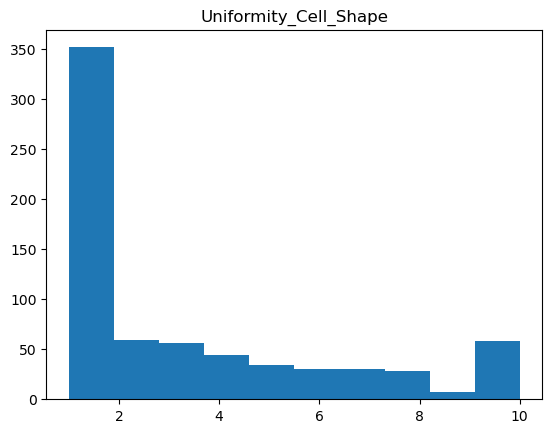

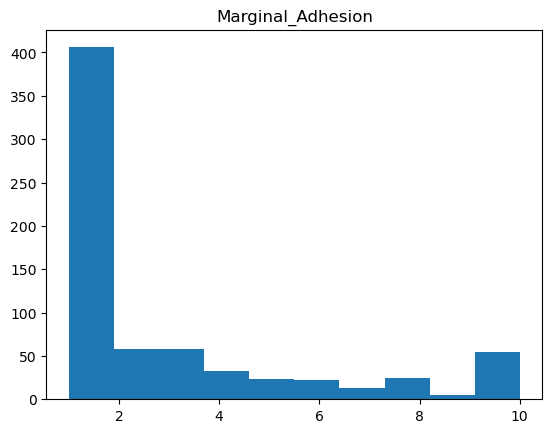

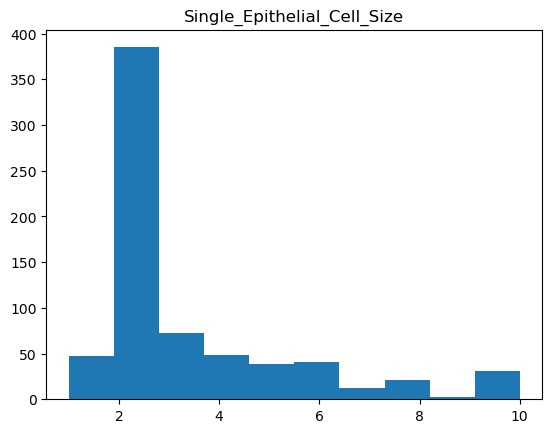

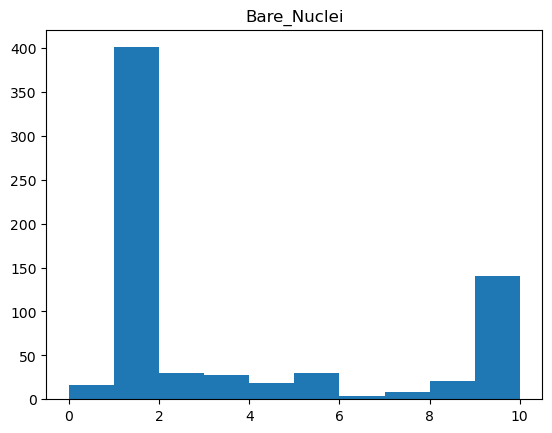

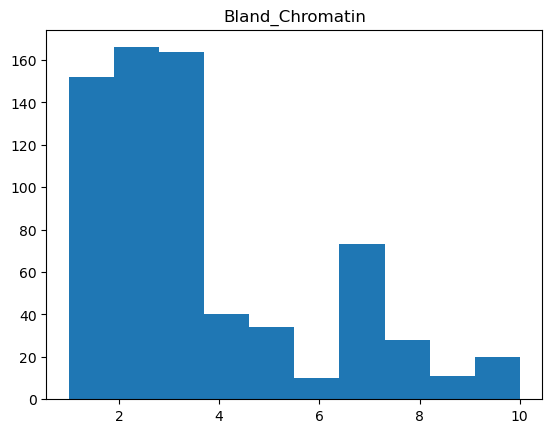

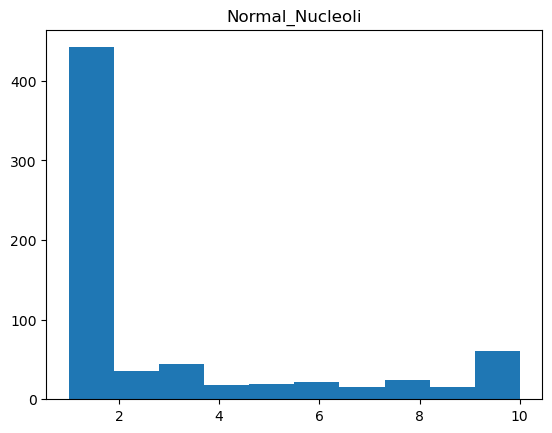

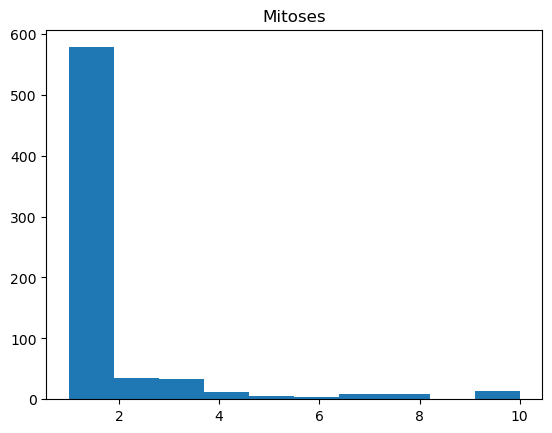

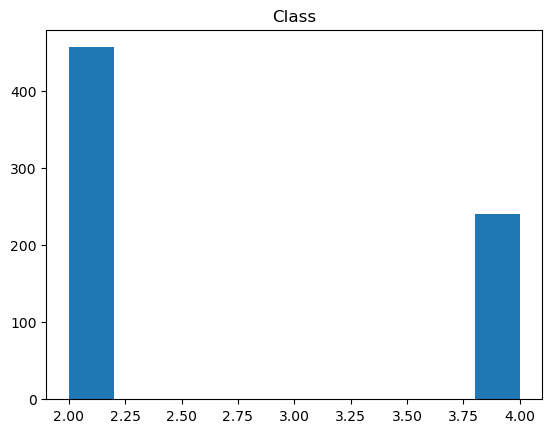

In [9]:
for column in df.columns:
    plt.title(column)
    plt.hist(x=df[column])
    plt.show()

### Estimate correlation coefficients and represent using heatmaps

<Axes: >

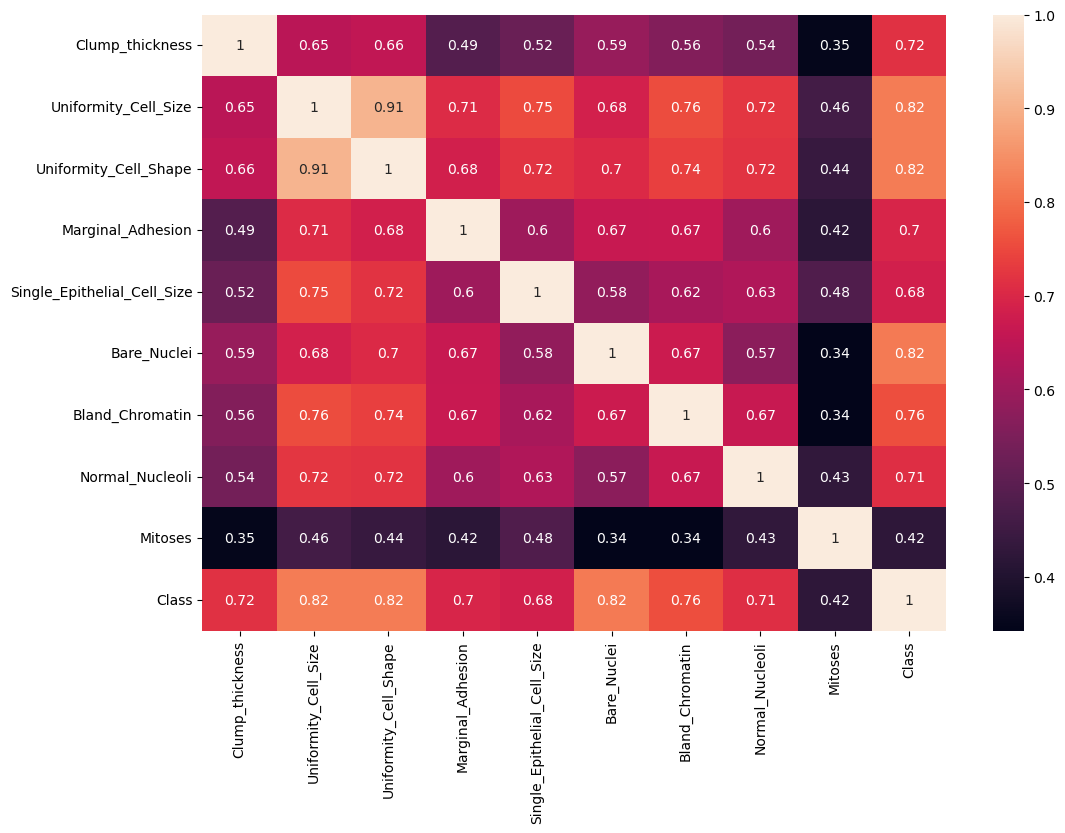

In [10]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=corr,annot=True)

In [11]:
df["Class"]=df["Class"].map({2:0,4:1})

### Declare feature vector and target variable

In [12]:
feature_vectors=df.iloc[:,:-1]
feature_vectors

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1
...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1
694,2,1,1,1,2,1,1,1,1
695,5,10,10,3,7,3,8,10,2
696,4,8,6,4,3,4,10,6,1


In [13]:
target_variable=df.iloc[:,-1]
target_variable

0      0
1      0
2      0
3      0
4      1
      ..
693    0
694    0
695    1
696    1
697    1
Name: Class, Length: 698, dtype: int64

In [14]:
target_variable.value_counts()

0    457
1    241
Name: Class, dtype: int64

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Implementing K-Nearest Neighbours with K=3

### Split data into training and test set

In [16]:
x_train,x_test,y_train,y_test=train_test_split(feature_vectors,target_variable,train_size=0.8,random_state=5)

In [17]:
x_train

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
355,5,3,3,1,3,3,3,3,3
675,1,1,2,1,2,1,2,1,1
261,8,8,9,4,5,10,7,8,1
267,10,8,8,2,3,4,8,7,8
510,5,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
8,4,2,1,1,2,1,2,1,1
73,10,6,4,1,3,4,3,2,3
400,3,1,1,1,2,1,1,1,1
118,3,2,1,1,2,2,3,1,1


In [18]:
x_test

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
286,3,1,1,1,3,1,2,1,1
433,6,9,7,5,5,8,4,2,1
558,5,1,1,1,2,1,2,1,1
187,5,8,4,10,5,8,9,10,1
373,3,1,2,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
583,5,1,1,6,3,1,1,1,1
395,3,1,1,1,2,1,3,1,1
504,3,3,1,1,2,1,1,1,1
565,3,1,2,1,2,1,3,1,1


In [19]:
y_train

355    1
675    0
261    1
267    1
510    0
      ..
8      0
73     1
400    0
118    0
206    0
Name: Class, Length: 558, dtype: int64

In [20]:
y_test

286    0
433    0
558    0
187    1
373    0
      ..
583    0
395    0
504    0
565    0
129    0
Name: Class, Length: 140, dtype: int64

### Perform Feature Scaling(Normalize)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
def scale(df):
    scaler=MinMaxScaler()
    for col in df.columns:
        df[col]=scaler.fit_transform(df[col].values.reshape(-1,1))
    return df

x_train=scale(x_train)

In [23]:
x_train

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
355,0.444444,0.222222,0.222222,0.000000,0.222222,0.3,0.222222,0.222222,0.222222
675,0.000000,0.000000,0.111111,0.000000,0.111111,0.1,0.111111,0.000000,0.000000
261,0.777778,0.777778,0.888889,0.333333,0.444444,1.0,0.666667,0.777778,0.000000
267,1.000000,0.777778,0.777778,0.111111,0.222222,0.4,0.777778,0.666667,0.777778
510,0.444444,0.000000,0.000000,0.000000,0.111111,0.1,0.111111,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
8,0.333333,0.111111,0.000000,0.000000,0.111111,0.1,0.111111,0.000000,0.000000
73,1.000000,0.555556,0.333333,0.000000,0.222222,0.4,0.222222,0.111111,0.222222
400,0.222222,0.000000,0.000000,0.000000,0.111111,0.1,0.000000,0.000000,0.000000
118,0.222222,0.111111,0.000000,0.000000,0.111111,0.2,0.222222,0.000000,0.000000


In [24]:
x_test=scale(x_test)
x_test

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
286,0.222222,0.000000,0.000000,0.000000,0.222222,0.1,0.111111,0.000000,0.0
433,0.555556,0.888889,0.666667,0.444444,0.444444,0.8,0.333333,0.111111,0.0
558,0.444444,0.000000,0.000000,0.000000,0.111111,0.1,0.111111,0.000000,0.0
187,0.444444,0.777778,0.333333,1.000000,0.444444,0.8,0.888889,1.000000,0.0
373,0.222222,0.000000,0.111111,0.000000,0.111111,0.1,0.111111,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
583,0.444444,0.000000,0.000000,0.555556,0.222222,0.1,0.000000,0.000000,0.0
395,0.222222,0.000000,0.000000,0.000000,0.111111,0.1,0.222222,0.000000,0.0
504,0.222222,0.222222,0.000000,0.000000,0.111111,0.1,0.000000,0.000000,0.0
565,0.222222,0.000000,0.111111,0.000000,0.111111,0.1,0.222222,0.000000,0.0


### Fit the K Neighbours Classifier to the training set

In [25]:
KNN=KNeighborsClassifier(n_neighbors=3)

In [26]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Predict test-set results 

In [27]:
y_pred=KNN.predict(x_test)

In [28]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

### Check the accuracy score 

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score

In [30]:
accuracy_3=accuracy_score(y_test,y_pred)
precision_3=precision_score(y_test,y_pred)
f1_3=f1_score(y_test,y_pred)
recall_3=recall_score(y_test,y_pred)
print("accuracy is",accuracy_3)
print("precision is",precision_3)
print("f1 is",f1_3)
print("recall is",recall_3)

accuracy is 0.9785714285714285
precision is 0.9574468085106383
f1 is 0.967741935483871
recall is 0.9782608695652174


### Compare the train-set and test-set accuracy

In [31]:
Y_pred=KNN.predict(x_train)
Train_set_accuracy=accuracy_score(y_train,Y_pred)
Train_set_accuracy

0.9767025089605734

### Display confusion matrix

<Axes: >

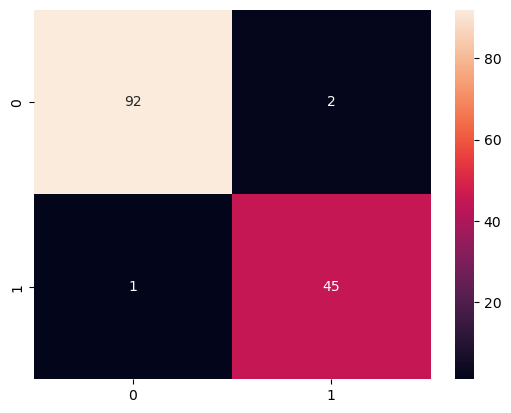

In [32]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### Generate classification report

In [33]:
from sklearn.metrics import classification_report

In [34]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98        94\n           1       0.96      0.98      0.97        46\n\n    accuracy                           0.98       140\n   macro avg       0.97      0.98      0.98       140\nweighted avg       0.98      0.98      0.98       140\n'

### Generate ROC curve and ROC AUC score.

0.9784921369102682


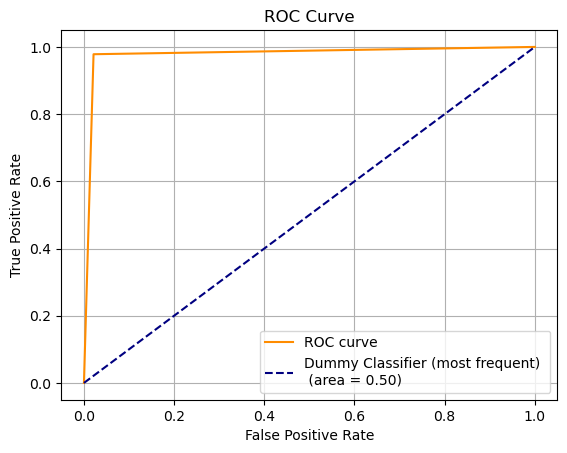

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
roc_auc=roc_auc_score(y_test, y_pred)
print(roc_auc)
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(x_train, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1] )
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()

In [36]:
from sklearn.model_selection import KFold,cross_val_score

In [37]:
kfold=KFold(n_splits=10,shuffle=True,random_state=5)
accuracy=cross_val_score(KNN,feature_vectors,target_variable,cv=kfold,scoring='accuracy')#should pass x and y completely and the model we doing any can be
precision=cross_val_score(KNN,feature_vectors,target_variable,cv=kfold,scoring='precision_macro')
f1=cross_val_score(KNN,feature_vectors,target_variable,cv=kfold,scoring='f1_macro')
recall=cross_val_score(KNN,feature_vectors,target_variable,cv=kfold,scoring='recall_macro')
results = []
for i in range(10):
    results.append([i+1, accuracy[i], precision[i], f1[i], recall[i]])
kfold_results = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'F1 Score', 'Recall'])
kfold_results

,Fold,Accuracy,Precision,F1 Score,Recall
0,1,0.957143,0.948889,0.952904,0.957428
1,2,1.000000,1.000000,1.000000,1.000000
2,3,0.957143,0.957428,0.952904,0.948889
3,4,0.971429,0.969406,0.969406,0.969406
4,5,0.971429,0.966856,0.966856,0.966856
5,6,0.957143,0.937500,0.950877,0.969388
6,7,0.928571,0.927518,0.928205,0.929276
7,8,0.957143,0.951613,0.956058,0.964286
8,9,0.985507,0.990566,0.980087,0.970588
9,10,0.985507,0.989130,0.983867,0.979167


In [38]:
#calculating mean to see model performance
kfold_results.iloc[:,1:5].mean()

Accuracy     0.967101
Precision    0.963891
F1 Score     0.964116
Recall       0.965528
dtype: float64

### Rebuild the kNN Classification model using different values of k (3,4,5,6,7,8,9)

### Tabulate the results using the Tabulate package

In [39]:
from tabulate import tabulate

In [40]:
neighbours = [3, 4, 5, 6, 7, 8, 9]
train_size = [0.75, 0.70, 0.80]
accuracy = {}
precision = {}
f1 = {}
recall = {}

def KNN(neighbours, train_size, feature_vectors, target_variable):
    results = []

    for k in neighbours:
        for i in train_size:
            x_train, x_test, y_train, y_test = train_test_split(feature_vectors, target_variable, train_size=i, random_state=5)
            x_train = scale(x_train)
            x_test = scale(x_test)
            KNN = KNeighborsClassifier(n_neighbors=k)
            KNN.fit(x_train, y_train)
            y_pred = KNN.predict(x_test)
            accuracy[k] = accuracy_score(y_test, y_pred)
            precision[k] = precision_score(y_test, y_pred)
            f1[k] = f1_score(y_test, y_pred)
            recall[k] = recall_score(y_test, y_pred)
            results.append([k, i, accuracy[k], precision[k], f1[k], recall[k]])

    headers = ["K", "Train Size", "Accuracy", "Precision", "F1 Score", "Recall"]
    print(tabulate(results, headers=headers, tablefmt="grid"))

KNN(neighbours, train_size, feature_vectors, target_variable)

+-----+--------------+------------+-------------+------------+----------+
|   K |   Train Size |   Accuracy |   Precision |   F1 Score |   Recall |
+=====+==============+============+=============+============+==========+
|   3 |         0.75 |   0.971429 |    0.966102 |   0.957983 | 0.95     |
+-----+--------------+------------+-------------+------------+----------+
|   3 |         0.7  |   0.971429 |    0.957746 |   0.957746 | 0.957746 |
+-----+--------------+------------+-------------+------------+----------+
|   3 |         0.8  |   0.978571 |    0.957447 |   0.967742 | 0.978261 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.75 |   0.977143 |    0.982759 |   0.966102 | 0.95     |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.7  |   0.97619  |    0.971429 |   0.964539 | 0.957746 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.8  |   0.985714 |   